# Import dependencies

In [2]:
import timm
import torch
import cv2
import matplotlib.pyplot as plt
import time

# Import MiDaS (all versions)

In [1]:
model_type_large = "DPT_Large" 
model_type_medium = "DPT_Hybrid" 
model_type_small = "MiDaS_small"

In [7]:
# Size ~ 1.3G
midas_large = torch.hub.load("intel-isl/MiDaS", model_type_large)

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master


In [5]:
# Size ~ 480M
midas_medium = torch.hub.load("intel-isl/MiDaS", model_type_medium)

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_hybrid_384.pt" to C:\Users\PC/.cache\torch\hub\checkpoints\dpt_hybrid_384.pt
100%|██████████| 470M/470M [06:48<00:00, 1.21MB/s]  


In [3]:
# Size ~ 85M
midas_small = torch.hub.load("intel-isl/MiDaS", model_type_small)

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\PC/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


In [12]:
midas_large.to('cpu')
midas_large.eval()

midas_medium.to('cpu')
midas_medium.eval()

midas_small.to('cpu')
midas_small.eval()

MidasNet_small(
  (pretrained): Module(
    (layer1): Sequential(
      (0): Conv2dSameExport(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
      (1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
      (3): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act1): ReLU6(inplace=True)
          (se): Identity()
          (conv_pw): Conv2d(32, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn2): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
          (act2): Identity()
        )
      )
      (4): Sequential(
        (0): InvertedResidual(
          (conv_pw): Conv2d(24, 144, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(144,

# Transforms (for image manipulation)

In [14]:
transforms = torch.hub.load('intel-isl/MiDaS', 'transforms')
transform_dpt = transforms.dpt_transform #used to both large and medium
transform_small = transforms.small_transform

Using cache found in C:\Users\PC/.cache\torch\hub\intel-isl_MiDaS_master


# Test function

The test function computes, plots and returns the depth map of an image using a given MiDaS algorithm version

In [26]:
def test_midas(midas_version, transform, filepath):
    img = cv2.imread(filepath)
    print("Image dimensions : ", img.shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    img_batch = transform(img).to('cpu')
    
    with torch.no_grad():
        prediction = midas_version(img_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
    
    depth_map = prediction.cpu().numpy()
    
    plt.imshow(depth_map)
    plt.axis("off")
    plt.show()
    
    return depth_map

# Testing the algorithms

Image dimensions :  (1080, 1920, 3)


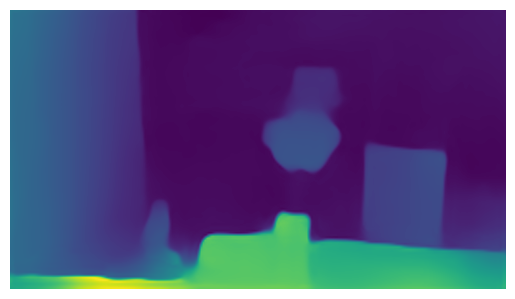

Execution time: 7.5605628490448 seconds


In [28]:
start_time = time.time()

depth_map_small = test_midas(midas_small, transform_small, 'im0.png')

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Image dimensions :  (1080, 1920, 3)


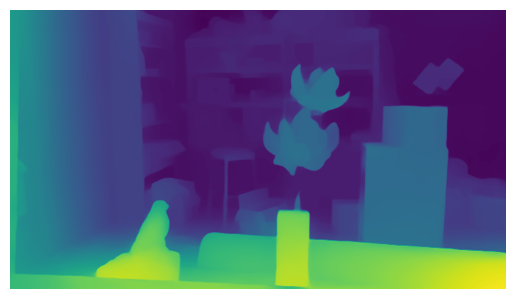

Execution time: 82.15224719047546 seconds


In [29]:
start_time = time.time()

depth_map_medium = test_midas(midas_medium, transform_dpt, 'im0.png')

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")

Image dimensions :  (1080, 1920, 3)


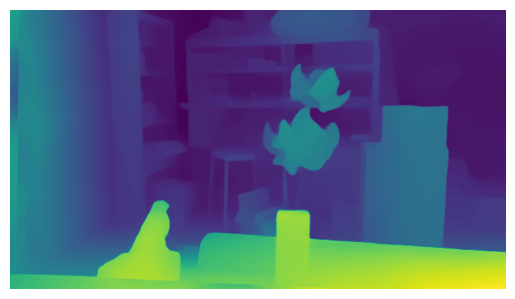

Execution time: 114.58315992355347 seconds


In [30]:
start_time = time.time()

depth_map_large = test_midas(midas_large, transform_dpt, 'im0.png')

end_time = time.time()
total_time = end_time - start_time
print(f"Execution time: {total_time} seconds")